# Reading and loading the synthetic group galaxy catalogues

This is a tutorial that shows how to properly read and load the mock catalogues for this project.
The first thing you will need are the packages from the `environment.yml` file, especially:

- [cosmo-utils](https://cosmo-utils.readthedocs.io/en/latest/)
- [h5py](https://www.h5py.org/)

In [1]:
## Load the necessary modules
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cosmo_utils.utils import file_readers as cfreaders

# Showing latex
from matplotlib import rc
rc('text', usetex=False)

/Users/victor2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Location of the data

The data is located at: [http://lss.phy.vanderbilt.edu/groups/data_eco_vc/ECO_CAM/Mock_Catalogues/Planck/mvir/ECO/](http://lss.phy.vanderbilt.edu/groups/data_eco_vc/ECO_CAM/Mock_Catalogues/Planck/mvir/ECO/)

After you've downloaded the set of catalogues that you need, you may load them using their paths and the **`read_hdf5_file_to_pandas_DF`** function from `cosmo_utils`.

In [2]:
# Path to file
# This is the path to the mock catalogue that you want to `read`
filepath = './data/mock_1a_-01_ECO_cat_0_Planck_memb_cat.hdf5'

Now you can use the **`read_hdf5_file_to_pandas_DF`** function to load the dataset:

In [3]:
mock_data = cfreaders.read_hdf5_file_to_pandas_DF(filepath)

You can show some of the contents of the mock catalogues:

In [4]:
mock_data.head()

,halo_upid,halo_hostid,halo_mpeak,halo_x,halo_y,halo_id,halo_z,halo_vx,halo_vy,halo_vz,...,dec,cz,cz_nodist,vel_tot,vel_tan,groupid,M_group,g_ngal,g_galtype,halo_rvir
0,-1,9462626500,2.719000e+11,10.42090,34.251259,9462626500,9.900350,-99.400002,-46.700001,152.100006,...,6.258420,3586.315560,3587.828415,187.605075,187.598975,0,11.497392,1,1,0.104887
1,-1,9462626890,1.344000e+11,11.39054,34.620399,9462626890,10.683220,-17.629999,-23.840000,170.710007,...,7.478745,3611.656892,3608.157623,173.265889,173.230550,1,11.392590,1,1,0.082887
2,-1,9462624409,5.725000e+12,11.31186,34.059341,9462624409,12.398640,-196.979996,-62.130001,53.669998,...,10.317044,3580.973040,3582.688859,213.405067,213.398169,2,12.455012,1,1,0.289915
3,-1,9462638623,6.573000e+11,10.57048,34.020142,9462638623,22.545151,-173.979996,-198.539993,214.070007,...,25.110810,3870.258014,3910.578346,339.872242,337.472090,3,11.929068,1,1,0.140837
4,-1,9461683788,5.773000e+11,9.84364,34.398949,9461683788,19.608681,-44.040001,-205.259995,112.660004,...,20.777798,3715.213229,3847.643784,238.250844,198.054571,4,11.889293,2,1,0.134922


Or show the columns of the catalog:

In [5]:
mock_data.columns.tolist()

['halo_upid',
 'halo_hostid',
 'halo_mpeak',
 'halo_x',
 'halo_y',
 'halo_id',
 'halo_z',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_acc_rate_100myr',
 'halo_vpeak',
 'halo_mvir',
 'halo_half_mass_scale',
 'halo_mvir_host_halo',
 'bijected_b_to_a',
 'stellar_mass',
 'abs_umag',
 'abs_gmag',
 'b_to_a',
 'num_morph_type',
 'fgas',
 'fsmgr',
 'gas_mass',
 'g_minus_r',
 'u_minus_r',
 'baryonic_mass',
 'dgr',
 'abs_rmag',
 'bijected_fgas',
 'reference_idx',
 'cs_flag',
 'haloid_host_ngal',
 'log_host_mvir',
 'dist_c',
 'r_dist',
 'ra',
 'dec',
 'cz',
 'cz_nodist',
 'vel_tot',
 'vel_tan',
 'groupid',
 'M_group',
 'g_ngal',
 'g_galtype',
 'halo_rvir']

Additonally, you can make cuts on the data. For example, you may select only **centrals**, which are designated when **`galtype == 1`**

In [6]:
mock_cens = mock_data.loc[(mock_data['cs_flag'] == 1)]
mock_cens.head()

,halo_upid,halo_hostid,halo_mpeak,halo_x,halo_y,halo_id,halo_z,halo_vx,halo_vy,halo_vz,...,dec,cz,cz_nodist,vel_tot,vel_tan,groupid,M_group,g_ngal,g_galtype,halo_rvir
0,-1,9462626500,2.719000e+11,10.42090,34.251259,9462626500,9.900350,-99.400002,-46.700001,152.100006,...,6.258420,3586.315560,3587.828415,187.605075,187.598975,0,11.497392,1,1,0.104887
1,-1,9462626890,1.344000e+11,11.39054,34.620399,9462626890,10.683220,-17.629999,-23.840000,170.710007,...,7.478745,3611.656892,3608.157623,173.265889,173.230550,1,11.392590,1,1,0.082887
2,-1,9462624409,5.725000e+12,11.31186,34.059341,9462624409,12.398640,-196.979996,-62.130001,53.669998,...,10.317044,3580.973040,3582.688859,213.405067,213.398169,2,12.455012,1,1,0.289915
3,-1,9462638623,6.573000e+11,10.57048,34.020142,9462638623,22.545151,-173.979996,-198.539993,214.070007,...,25.110810,3870.258014,3910.578346,339.872242,337.472090,3,11.929068,1,1,0.140837
4,-1,9461683788,5.773000e+11,9.84364,34.398949,9461683788,19.608681,-44.040001,-205.259995,112.660004,...,20.777798,3715.213229,3847.643784,238.250844,198.054571,4,11.889293,2,1,0.134922


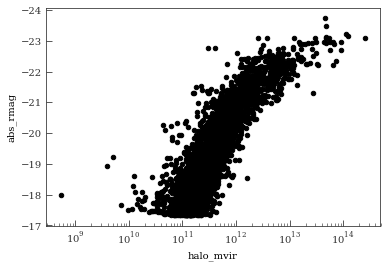

In [7]:
ax = mock_cens.plot(x='halo_mvir', y='abs_rmag', kind='scatter', logx=True)
ax.invert_yaxis()

Or you can also show for centrals and satellites:

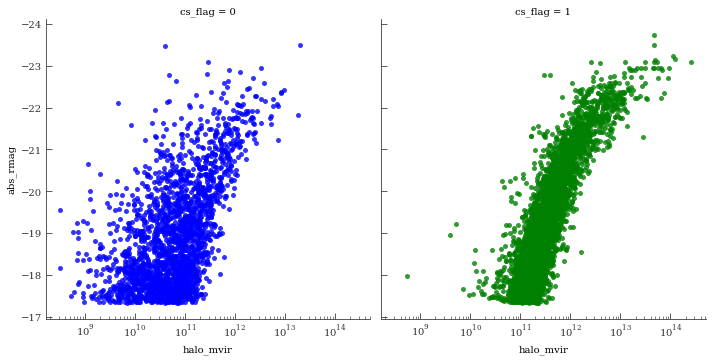

In [8]:
g = sns.lmplot(x='halo_mvir', y='abs_rmag', hue='cs_flag', col='cs_flag',
           data=mock_data.loc[:,['halo_mvir', 'abs_rmag', 'cs_flag']],
           logx=True, fit_reg=False, sharex=True, sharey=True)

for ax in g.axes[0].flatten():
    ax.set_xscale('log')
ax.invert_yaxis()